## Community-level carbon allocation among enzyme, osmolyte, and yield

Bin Wang|wbwenwu@gmail.com

June 15th, 2021

---

At the very end, a package creating combined svg figures from sepearate panels in svg is used.
https://github.com/btel/svg_utils

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import ternary

print("pandas version:", pd.__version__)
print('numpy version:',  np.__version__)
print('matplotlib version:',  matplotlib.__version__)
print("ternary version:",ternary.__version__)

pandas version: 1.2.2
numpy version: 1.19.2
matplotlib version: 3.3.4
ternary version: 1.0.8


In [2]:
def yas_data(origin,site):
    """
    Derive YAS data by community.
    
    Parameters:
       origin: original site;character
       site:   the site of translocation;character
    """
    
    enzyme_origin_site   = origin + '/' + 'Enzyme'   + '_' + origin + '_' + site + '.csv'
    osmolyte_origin_site = origin + '/' + 'Osmolyte' + '_' + origin + '_' + site + '.csv'
    yield_origin_site    = origin + '/' + 'Yield'    + '_' + origin + '_' + site + '.csv'
    
    enzyme   = pd.read_csv(enzyme_origin_site,index_col=0)
    osmolyte = pd.read_csv(osmolyte_origin_site,index_col=0)
    yieldx   = pd.read_csv(yield_origin_site,index_col=0)
    yieldx[yieldx < 0] = 0
    
    community = pd.concat([osmolyte.sum(axis=0),yieldx.sum(axis=0),enzyme.sum(axis=0)],axis=1,sort=False)
    community.columns = ['Osmolyte','Yield','Enzyme']
    total = community.sum(axis=1)
    community_alive = 100*community[total>0].divide(total[total>0],axis=0)
    
    return community_alive

## desert

In [3]:
desert_desert    = yas_data('desert','desert')
desert_scrubland = yas_data('desert','scrubland')
desert_grassland = yas_data('desert','grassland')
desert_pineoak   = yas_data('desert','pineoak')
desert_subalpine = yas_data('desert','subalpine')

desert_desert.head()

,Osmolyte,Yield,Enzyme
1,0.048705,0.00000,99.951295
2,0.048823,0.00000,99.951177
3,0.048888,0.00000,99.951112
4,0.048917,0.00000,99.951083
5,0.047558,2.72593,97.226511


In [4]:
year = int(5)
desert_desert_y    = desert_desert.iloc[365*(year-1):365*year,:]
desert_scrubland_y = desert_scrubland.iloc[365*(year-1):365*year,:]
desert_grassland_y = desert_grassland.iloc[365*(year-1):365*year,:]
desert_pineoak_y   = desert_pineoak.iloc[365*(year-1):365*year,:]
desert_subalpine_y = desert_subalpine.iloc[365*(year-1):365*year,:]

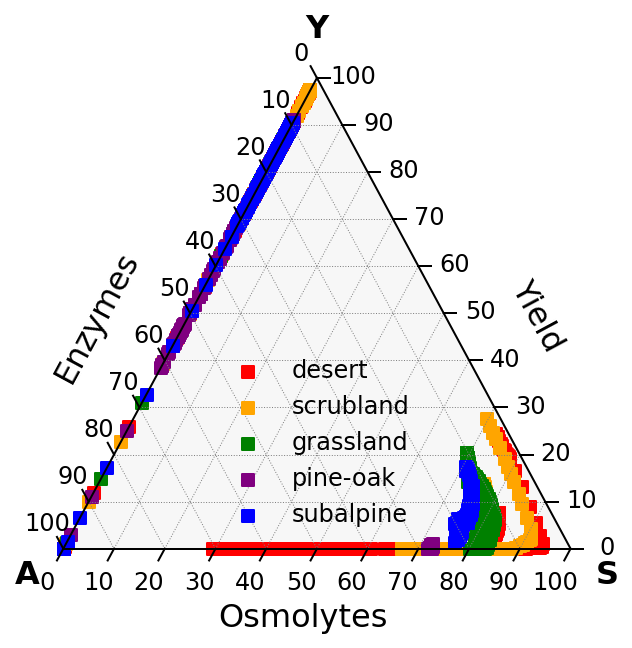

In [5]:
# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(desert_desert_y.values,      marker='s',color='red',   label="desert",alpha=1.0)
tax.scatter(desert_scrubland_y.values,   marker='s',color='orange',   label="scrubland",alpha=1.0)
tax.scatter(desert_grassland_y.values,   marker='s',color='green',   label="grassland",alpha=1.0)
tax.scatter(desert_pineoak_y.values,     marker='s',color='purple',   label="pine-oak",alpha=1.0)
tax.scatter(desert_subalpine_y.values,   marker='s',color='blue',   label="subalpine",alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Yield",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('figures/ternary/desert_1.pdf')
tax.savefig('figures/ternary/desert_1.svg')

tax.show()

No handles with labels found to put in legend.


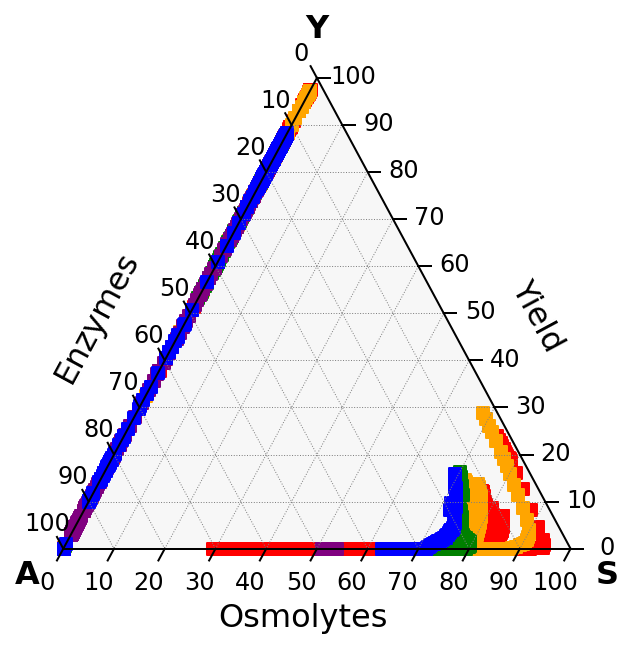

In [6]:
year = int(8)
desert_desert_y    = desert_desert.iloc[365*(year-1):365*year,:]
desert_scrubland_y = desert_scrubland.iloc[365*(year-1):365*year,:]
desert_grassland_y = desert_grassland.iloc[365*(year-1):365*year,:]
desert_pineoak_y   = desert_pineoak.iloc[365*(year-1):365*year,:]
desert_subalpine_y = desert_subalpine.iloc[365*(year-1):365*year,:]

# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(desert_desert_y.values,      marker='s',color='red',   label="",alpha=1.0)
tax.scatter(desert_scrubland_y.values,   marker='s',color='orange',   label="",alpha=1.0)
tax.scatter(desert_grassland_y.values,   marker='s',color='green',   label="",alpha=1.0)
tax.scatter(desert_pineoak_y.values,     marker='s',color='purple',   label="",alpha=1.0)
tax.scatter(desert_subalpine_y.values,   marker='s',color='blue',   label="",alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Yield",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('figures/ternary/desert_2.pdf')
tax.savefig('figures/ternary/desert_2.svg')

tax.show()

## scrubland

In [7]:
origin = "scrubland"
scrubland_desert    = yas_data(origin,'desert')
scrubland_scrubland = yas_data(origin,'scrubland')
scrubland_grassland = yas_data(origin,'grassland')
scrubland_pineoak   = yas_data(origin,'pineoak')
scrubland_subalpine = yas_data(origin,'subalpine')

scrubland_desert.head()

,Osmolyte,Yield,Enzyme
1,0.048705,0.0,99.951295
2,0.048857,0.0,99.951143
3,0.048971,0.0,99.951029
4,0.049062,0.0,99.950938
5,0.049110,0.0,99.950890


No handles with labels found to put in legend.


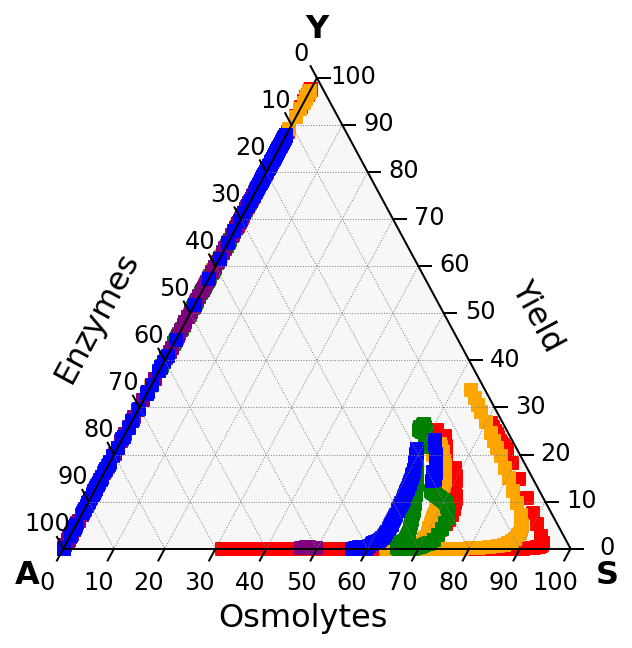

In [8]:
year = int(5)
scrubland_desert_y    = scrubland_desert.iloc[365*(year-1):365*year,:]
scrubland_scrubland_y = scrubland_scrubland.iloc[365*(year-1):365*year,:]
scrubland_grassland_y = scrubland_grassland.iloc[365*(year-1):365*year,:]
scrubland_pineoak_y   = scrubland_pineoak.iloc[365*(year-1):365*year,:]
scrubland_subalpine_y = scrubland_subalpine.iloc[365*(year-1):365*year,:]


# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(scrubland_desert_y.values,      marker='s',color='red',      label="",   alpha=1.0)
tax.scatter(scrubland_scrubland_y.values,   marker='s',color='orange',   label="",alpha=1.0)
tax.scatter(scrubland_grassland_y.values,   marker='s',color='green',    label="",alpha=1.0)
tax.scatter(scrubland_pineoak_y.values,     marker='s',color='purple',   label="",  alpha=1.0)
tax.scatter(scrubland_subalpine_y.values,   marker='s',color='blue',     label="",alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Yield",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('figures/ternary/scrubland_1.pdf')
tax.savefig('figures/ternary/scrubland_1.svg')

tax.show()

No handles with labels found to put in legend.


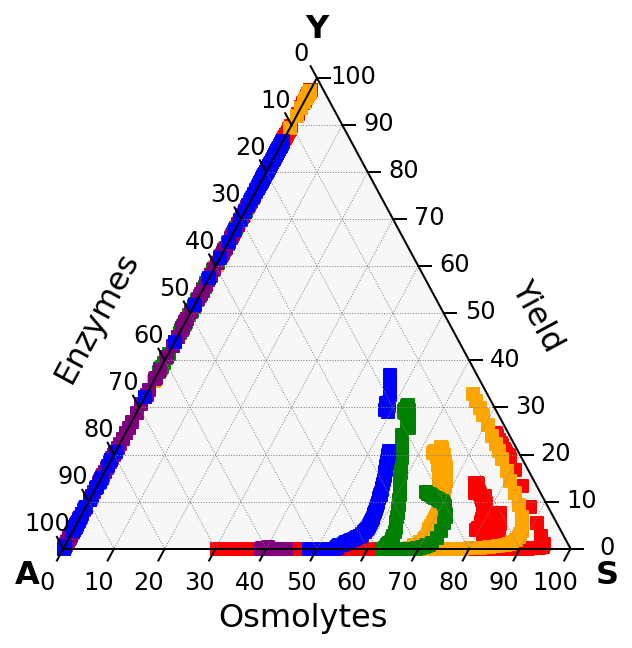

In [9]:
year = int(8)
scrubland_desert_y    = scrubland_desert.iloc[365*(year-1):365*year,:]
scrubland_scrubland_y = scrubland_scrubland.iloc[365*(year-1):365*year,:]
scrubland_grassland_y = scrubland_grassland.iloc[365*(year-1):365*year,:]
scrubland_pineoak_y   = scrubland_pineoak.iloc[365*(year-1):365*year,:]
scrubland_subalpine_y = scrubland_subalpine.iloc[365*(year-1):365*year,:]


# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(scrubland_desert_y.values,      marker='s',color='red',   label="",   alpha=1.0)
tax.scatter(scrubland_scrubland_y.values,   marker='s',color='orange',label="",alpha=1.0)
tax.scatter(scrubland_grassland_y.values,   marker='s',color='green', label="",alpha=1.0)
tax.scatter(scrubland_pineoak_y.values,     marker='s',color='purple',label="", alpha=1.0)
tax.scatter(scrubland_subalpine_y.values,   marker='s',color='blue',  label="",alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Yield",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('figures/ternary/scrubland_2.pdf')
tax.savefig('figures/ternary/scrubland_2.svg')

tax.show()

## grassland

In [10]:
origin = "grassland"
grassland_desert    = yas_data(origin,'desert')
grassland_scrubland = yas_data(origin,'scrubland')
grassland_grassland = yas_data(origin,'grassland')
grassland_pineoak   = yas_data(origin,'pineoak')
grassland_subalpine = yas_data(origin,'subalpine')

grassland_desert.head()

,Osmolyte,Yield,Enzyme
1,0.048705,0.000000,99.951295
2,0.048837,0.000000,99.951163
3,0.048923,0.000000,99.951077
4,0.048979,0.000000,99.951021
5,0.048870,0.233019,99.718111


No handles with labels found to put in legend.


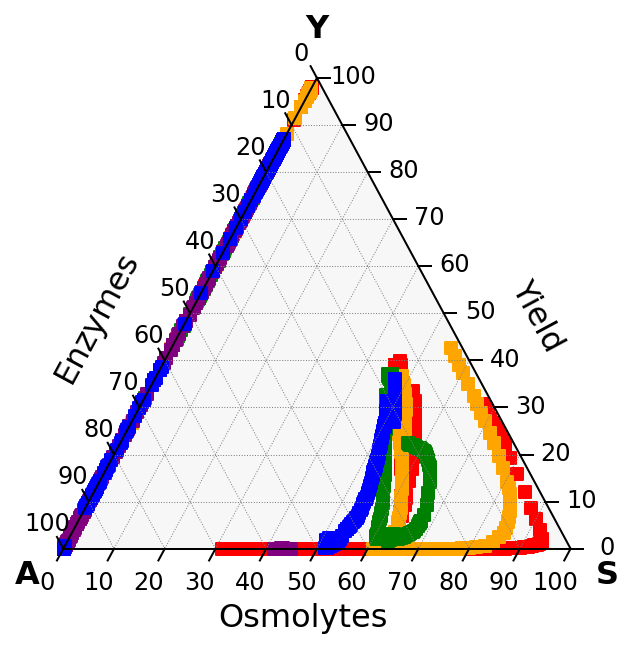

In [11]:
year = int(5)
grassland_desert_y    = grassland_desert.iloc[365*(year-1):365*year,:]
grassland_scrubland_y = grassland_scrubland.iloc[365*(year-1):365*year,:]
grassland_grassland_y = grassland_grassland.iloc[365*(year-1):365*year,:]
grassland_pineoak_y   = grassland_pineoak.iloc[365*(year-1):365*year,:]
grassland_subalpine_y = grassland_subalpine.iloc[365*(year-1):365*year,:]


# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(grassland_desert_y.values,      marker='s',color='red',   label="",alpha=1.0)
tax.scatter(grassland_scrubland_y.values,   marker='s',color='orange',   label="",alpha=1.0)
tax.scatter(grassland_grassland_y.values,   marker='s',color='green',   label="",alpha=1.0)
tax.scatter(grassland_pineoak_y.values,     marker='s',color='purple',   label="",alpha=1.0)
tax.scatter(grassland_subalpine_y.values,   marker='s',color='blue',   label="",alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Yield",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('figures/ternary/grassland_1.pdf')
tax.savefig('figures/ternary/grassland_1.svg')


tax.show()

No handles with labels found to put in legend.


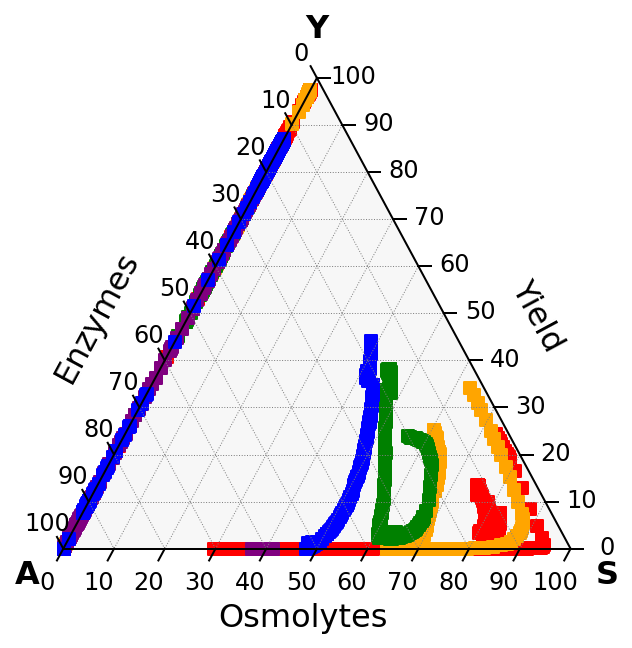

In [12]:
year = int(8)
grassland_desert_y    = grassland_desert.iloc[365*(year-1):365*year,:]
grassland_scrubland_y = grassland_scrubland.iloc[365*(year-1):365*year,:]
grassland_grassland_y = grassland_grassland.iloc[365*(year-1):365*year,:]
grassland_pineoak_y   = grassland_pineoak.iloc[365*(year-1):365*year,:]
grassland_subalpine_y = grassland_subalpine.iloc[365*(year-1):365*year,:]


# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(grassland_desert_y.values,      marker='s',color='red',   label="",alpha=1.0)
tax.scatter(grassland_scrubland_y.values,   marker='s',color='orange',   label="",alpha=1.0)
tax.scatter(grassland_grassland_y.values,   marker='s',color='green',   label="",alpha=1.0)
tax.scatter(grassland_pineoak_y.values,     marker='s',color='purple',   label="",alpha=1.0)
tax.scatter(grassland_subalpine_y.values,   marker='s',color='blue',   label="",alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Yield",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('figures/ternary/grassland_2.pdf')
tax.savefig('figures/ternary/grassland_2.svg')

tax.show()

## pineoak

In [13]:
origin = "pineoak"
pineoak_desert    = yas_data(origin,'desert')
pineoak_scrubland = yas_data(origin,'scrubland')
pineoak_grassland = yas_data(origin,'grassland')
pineoak_pineoak   = yas_data(origin,'pineoak')
pineoak_subalpine = yas_data(origin,'subalpine')

pineoak_desert.head()

,Osmolyte,Yield,Enzyme
1,0.048705,0.0,99.951295
2,0.048875,0.0,99.951125
3,0.049015,0.0,99.950985
4,0.049141,0.0,99.950859
5,0.049229,0.0,99.950771


No handles with labels found to put in legend.


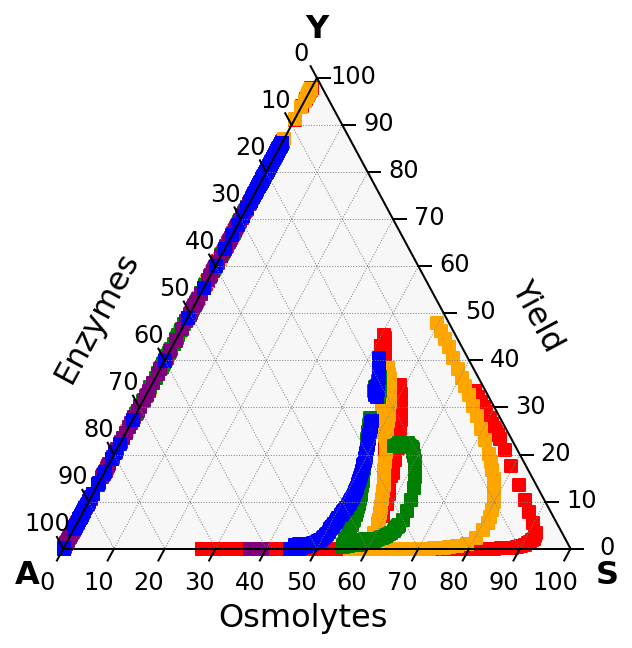

In [14]:
year = int(5)
pineoak_desert_y    = pineoak_desert.iloc[365*(year-1):365*year,:]
pineoak_scrubland_y = pineoak_scrubland.iloc[365*(year-1):365*year,:]
pineoak_grassland_y = pineoak_grassland.iloc[365*(year-1):365*year,:]
pineoak_pineoak_y   = pineoak_pineoak.iloc[365*(year-1):365*year,:]
pineoak_subalpine_y = pineoak_subalpine.iloc[365*(year-1):365*year,:]


# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(pineoak_desert_y.values,      marker='s',color='red',   label="",alpha=1.0)
tax.scatter(pineoak_scrubland_y.values,   marker='s',color='orange',   label="",alpha=1.0)
tax.scatter(pineoak_grassland_y.values,   marker='s',color='green',   label="",alpha=1.0)
tax.scatter(pineoak_pineoak_y.values,     marker='s',color='purple',   label="",alpha=1.0)
tax.scatter(pineoak_subalpine_y.values,   marker='s',color='blue',   label="",alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Yield",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('figures/ternary/pineoak_1.pdf')
tax.savefig('figures/ternary/pineoak_1.svg')

tax.show()

No handles with labels found to put in legend.


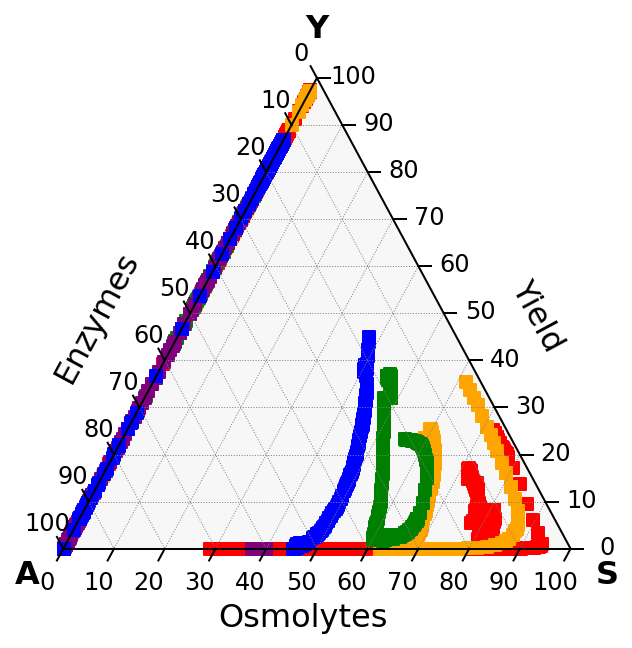

In [15]:
year = int(8)
pineoak_desert_y    = pineoak_desert.iloc[365*(year-1):365*year,:]
pineoak_scrubland_y = pineoak_scrubland.iloc[365*(year-1):365*year,:]
pineoak_grassland_y = pineoak_grassland.iloc[365*(year-1):365*year,:]
pineoak_pineoak_y   = pineoak_pineoak.iloc[365*(year-1):365*year,:]
pineoak_subalpine_y = pineoak_subalpine.iloc[365*(year-1):365*year,:]


# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(pineoak_desert_y.values,      marker='s',color='red',   label="",alpha=1.0)
tax.scatter(pineoak_scrubland_y.values,   marker='s',color='orange',   label="",alpha=1.0)
tax.scatter(pineoak_grassland_y.values,   marker='s',color='green',   label="",alpha=1.0)
tax.scatter(pineoak_pineoak_y.values,     marker='s',color='purple',   label="",alpha=1.0)
tax.scatter(pineoak_subalpine_y.values,   marker='s',color='blue',   label="",alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Yield",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

#tax.savefig('figures/ternary/pineoak_2.pdf')
tax.savefig('figures/ternary/pineoak_2.svg')
tax.show()

## subalpine

In [16]:
origin = "subalpine"
subalpine_desert    = yas_data(origin,'desert')
subalpine_scrubland = yas_data(origin,'scrubland')
subalpine_grassland = yas_data(origin,'grassland')
subalpine_pineoak   = yas_data(origin,'pineoak')
subalpine_subalpine = yas_data(origin,'subalpine')

subalpine_desert.head()

,Osmolyte,Yield,Enzyme
1,0.048705,0.0,99.951295
2,0.048878,0.0,99.951122
3,0.049024,0.0,99.950976
4,0.049156,0.0,99.950844
5,0.049253,0.0,99.950747


No handles with labels found to put in legend.


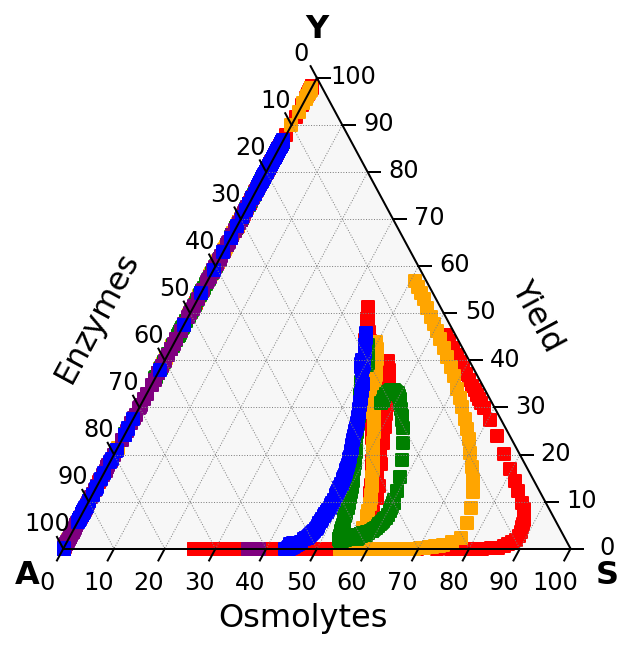

In [17]:
year = int(5)
subalpine_desert_y    = subalpine_desert.iloc[365*(year-1):365*year,:]
subalpine_scrubland_y = subalpine_scrubland.iloc[365*(year-1):365*year,:]
subalpine_grassland_y = subalpine_grassland.iloc[365*(year-1):365*year,:]
subalpine_pineoak_y   = subalpine_pineoak.iloc[365*(year-1):365*year,:]
subalpine_subalpine_y = subalpine_subalpine.iloc[365*(year-1):365*year,:]


# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(subalpine_desert_y.values,      marker='s',color='red',   label="",alpha=1.0)
tax.scatter(subalpine_scrubland_y.values,   marker='s',color='orange',   label="",alpha=1.0)
tax.scatter(subalpine_grassland_y.values,   marker='s',color='green',   label="",alpha=1.0)
tax.scatter(subalpine_pineoak_y.values,     marker='s',color='purple',   label="",alpha=1.0)
tax.scatter(subalpine_subalpine_y.values,   marker='s',color='blue',   label="",alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Yield",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

tax.savefig('figures/ternary/subalpine_1.svg')
tax.show()

No handles with labels found to put in legend.


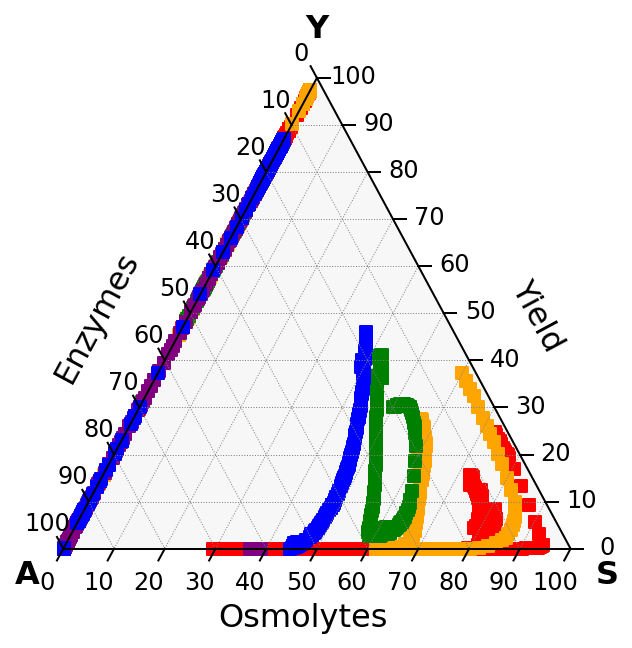

In [18]:
year = int(8)
subalpine_desert_y    = subalpine_desert.iloc[365*(year-1):365*year,:]
subalpine_scrubland_y = subalpine_scrubland.iloc[365*(year-1):365*year,:]
subalpine_grassland_y = subalpine_grassland.iloc[365*(year-1):365*year,:]
subalpine_pineoak_y   = subalpine_pineoak.iloc[365*(year-1):365*year,:]
subalpine_subalpine_y = subalpine_subalpine.iloc[365*(year-1):365*year,:]


# Scatter Plot
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(5,5)

tax.scatter(subalpine_desert_y.values,      marker='s',color='red',    alpha=1.0)
tax.scatter(subalpine_scrubland_y.values,   marker='s',color='orange', alpha=1.0)
tax.scatter(subalpine_grassland_y.values,   marker='s',color='green',  alpha=1.0)
tax.scatter(subalpine_pineoak_y.values,     marker='s',color='purple', alpha=1.0)
tax.scatter(subalpine_subalpine_y.values,   marker='s',color='blue',   alpha=1.0)


tax.legend(loc='lower center',bbox_to_anchor=(0.5, 0.1), frameon=False,fontsize=12)
tax.gridlines(multiple=scale/10, color="grey", linewidth=0.5)
tax.boundary(linewidth=1.0)
tax.ticks(axis='lbr', linewidth=1, multiple=scale/10,offset=0.025,fontsize=12)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


#tax.set_title("Scatter Plot", fontsize=20)
fontsize =16
tax.left_axis_label("Enzymes",    fontsize=fontsize, offset=0.18)
tax.right_axis_label("Yield",fontsize=fontsize, offset=0.18)
tax.bottom_axis_label("Osmolytes", fontsize=fontsize, offset=0.10)
tax.right_corner_label("S",fontsize=fontsize,weight='heavy')
tax.top_corner_label("Y",  fontsize=fontsize,weight='heavy')
tax.left_corner_label("A", fontsize=fontsize,weight='heavy')

# tax.gridlines(multiple=scale/10, color="blue", linewidth=0.5, offset=0.025, fontsize=12)
# tax.boundary(linewidth=1.0)
# tax.ticks(axis='lbr', linewidth=1, multiple=scale/10)
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')

tax.savefig('figures/ternary/subalpine_2.svg')
tax.show()

In [19]:
## composing svg files
from svgutils.compose import *

In [40]:
Figure(str(360*3)+"px","720px",
       Panel(
           SVG("figures/ternary/desert_1.svg"),
           Text("A",10,20,size=12,weight='bold')
       ),
       Panel(
           SVG("figures/ternary/desert_2.svg"),
           Text("D",10,20,size=12,weight='bold')
       ),
#        Panel(
#            SVG("figures/ternary/scrubland_1.svg"),
#            Text("C",10,20,size=12,weight='bold')
#        ),
#        Panel(
#            SVG("figures/ternary/scrubland_2.svg"),
#            Text("D",10,20,size=12,weight='bold')
#        ),
       Panel(
           SVG("figures/ternary/grassland_1.svg"),
           Text("B",10,20,size=12,weight='bold')
       ),
       Panel(
           SVG("figures/ternary/grassland_2.svg"),
           Text("E",10,20,size=12,weight='bold')
       ),
       Panel(
           SVG("figures/ternary/subalpine_1.svg"),
           Text("C",10,20,size=12,weight='bold')
       ),
       Panel(
           SVG("figures/ternary/subalpine_2.svg"),
           Text("F",10,20,size=12,weight='bold')
       )
      ).tile(3,2).save("figures/ternary/test_final_compose.svg")